# Logistic Regression – Predicting Viral Trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
    )

In [2]:
df = pd.read_csv("youtube_shorts_tiktok_trends_2025.csv")
df

,platform,country,region,language,category,hashtag,title_keywords,author_handle,sound_type,music_track,...,traffic_source,is_weekend,row_id,engagement_total,like_rate,dislike_rate,engagement_per_1k,engagement_like_rate,engagement_comment_rate,engagement_share_rate
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,Night Routine — College,NextVision,trending,8bit loop,...,External,1,2e681528d17a1fe1986857942536ec27,30317,0.086159,0.004004,120.069,0.086159,0.012555,0.007830
1,TikTok,Se,Europe,sv,Food,#Sports,Morning Routine — College,DailyVlogsDiego,trending,Street vibe,...,Search,0,2e35fa0b2978b9cae635839c1d4e9e74,30577,0.085298,0.002421,113.005,0.085298,0.007850,0.007791
2,TikTok,Za,Africa,en,Art,#Workout,Night Routine — College,BeyondHub,licensed,Gallery pad,...,External,1,0d88a011235a82244995ef52961f9502,503,0.049154,0.001625,68.111,0.049154,0.004469,0.005146
3,TikTok,Kr,Asia,ko,News,#Esports,Best Settings for Fortnite,NextHub,original,Neutral piano,...,Search,1,e15cff7621ed3f9eb9d2c97c841be0f3,7828,0.086257,0.003164,108.156,0.086257,0.011205,0.005292
4,TikTok,Au,Oceania,en,Beauty,#Comedy,When your friend is Beginners,LucasOfficial,licensed,Soft glam loop,...,ForYou,1,d696b4f0a50ea70e7cb5021be7e198ec,1171,0.051441,0.001175,72.400,0.051441,0.004204,0.004142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,Weekly Reset — Beginners,NoahChannel,licensed,Chill guitar,...,Search,0,a756bd218ad29bce51bad0fac806a857,2904,0.025804,0.001247,33.216,0.025804,0.003454,0.002059
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,Weekly Reset — Beginners,MrYuki,trending,Gallery pad,...,Home,1,0aeb762f68a9867eaf0b937006933021,2461,0.040411,0.005011,49.725,0.040411,0.003213,0.003617
48076,YouTube,Kr,Asia,ko,Science,#Comedy,When your friend is 2025,LifeOfAyaka,original,Lab beeps,...,Suggested,1,78ebd3268e18a3033895739c44680d82,1415,0.033513,0.003593,43.827,0.033513,0.004027,0.004119
48077,YouTube,Br,South America,pt,Pets,#OOTD,GRWM: Beginners Edition,TechieNoah,trending,Cute whistle,...,Home,1,67fd2032ade8be89da4c0208fbc05596,2457,0.043857,0.003594,59.272,0.043857,0.006465,0.003088


In [3]:
df = df.drop(columns = ["title_keywords", 'author_handle', 'sound_type', 'music_track',
       'week_of_year', 'views', 'likes', 'comments', 'shares',
       'saves', 'engagement_rate', 'source_hint', 'notes',
       'device_type', 'genre', 'dislikes', 'comment_ratio',
       'share_rate', 'save_rate', 'like_dislike_ratio', 'publish_dayofweek',
       'event_season', 'tags', 'sample_comments',
       'creator_avg_views', 'creator_tier', 'season', 'publish_date_approx',
       'year_month', 'title', 'title_length','engagement_total',
       'avg_watch_time_sec', 'device_brand',
       'traffic_source', 'row_id',
       'like_rate', 'dislike_rate', 'engagement_per_1k',
       'engagement_like_rate', 'engagement_comment_rate',
       'engagement_share_rate'])
df

,platform,country,region,language,category,hashtag,duration_sec,trend_label,upload_hour,trend_duration_days,trend_type,engagement_velocity,publish_period,has_emoji,completion_rate,is_weekend
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,40,rising,15,4,Short,63124.25,Afternoon,1,0.645,1
1,TikTok,Se,Europe,sv,Food,#Sports,18,declining,3,56,Evergreen,4831.79,Night,1,0.578,0
2,TikTok,Za,Africa,en,Art,#Workout,22,seasonal,15,11,Medium,671.36,Afternoon,0,0.532,1
3,TikTok,Kr,Asia,ko,News,#Esports,36,declining,15,10,Medium,7237.70,Afternoon,1,0.658,1
4,TikTok,Au,Oceania,en,Beauty,#Comedy,35,seasonal,18,6,Short,2695.67,Evening,1,0.703,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,45,declining,0,5,Short,17485.80,Night,0,0.669,0
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,56,declining,9,6,Short,8248.67,Morning,0,0.696,1
48076,YouTube,Kr,Asia,ko,Science,#Comedy,46,declining,21,11,Medium,2935.09,Evening,0,0.622,1
48077,YouTube,Br,South America,pt,Pets,#OOTD,56,seasonal,13,4,Short,10363.25,Afternoon,0,0.536,1


In [4]:
df.isnull().sum().sum()

np.int64(0)

In [5]:
# Convert trend_label into Binary (Viral vs Not Viral)
# Viral (1) - If trend_label is: rising & seasonal

# Not Viral (0) - If trend_label is: declining & stable

In [5]:
df["trend_label"] = df["trend_label"].str.lower().str.strip()

viral_map = {"rising":1,"seasonal":1,"declining":0,"stable":0}

df["viral"] = df["trend_label"].map(viral_map)
df

,platform,country,region,language,category,hashtag,duration_sec,trend_label,upload_hour,trend_duration_days,trend_type,engagement_velocity,publish_period,has_emoji,completion_rate,is_weekend,viral
0,TikTok,Jp,Asia,ja,Gaming,#Lifestyle,40,rising,15,4,Short,63124.25,Afternoon,1,0.645,1,1
1,TikTok,Se,Europe,sv,Food,#Sports,18,declining,3,56,Evergreen,4831.79,Night,1,0.578,0,0
2,TikTok,Za,Africa,en,Art,#Workout,22,seasonal,15,11,Medium,671.36,Afternoon,0,0.532,1,1
3,TikTok,Kr,Asia,ko,News,#Esports,36,declining,15,10,Medium,7237.70,Afternoon,1,0.658,1,0
4,TikTok,Au,Oceania,en,Beauty,#Comedy,35,seasonal,18,6,Short,2695.67,Evening,1,0.703,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,YouTube,Ke,Africa,sw,Lifestyle,#Motivation,45,declining,0,5,Short,17485.80,Night,0,0.669,0,0
48075,YouTube,Sa,Asia,ar,Art,#DanceChallenge,56,declining,9,6,Short,8248.67,Morning,0,0.696,1,0
48076,YouTube,Kr,Asia,ko,Science,#Comedy,46,declining,21,11,Medium,2935.09,Evening,0,0.622,1,0
48077,YouTube,Br,South America,pt,Pets,#OOTD,56,seasonal,13,4,Short,10363.25,Afternoon,0,0.536,1,1


In [6]:
df.columns = df.columns.str.replace(" ", "")

In [7]:
df["platform"] = df["platform"].str.strip().map({"TikTok":0,"YouTube":1})
df

,platform,country,region,language,category,hashtag,duration_sec,trend_label,upload_hour,trend_duration_days,trend_type,engagement_velocity,publish_period,has_emoji,completion_rate,is_weekend,viral
0,0,Jp,Asia,ja,Gaming,#Lifestyle,40,rising,15,4,Short,63124.25,Afternoon,1,0.645,1,1
1,0,Se,Europe,sv,Food,#Sports,18,declining,3,56,Evergreen,4831.79,Night,1,0.578,0,0
2,0,Za,Africa,en,Art,#Workout,22,seasonal,15,11,Medium,671.36,Afternoon,0,0.532,1,1
3,0,Kr,Asia,ko,News,#Esports,36,declining,15,10,Medium,7237.70,Afternoon,1,0.658,1,0
4,0,Au,Oceania,en,Beauty,#Comedy,35,seasonal,18,6,Short,2695.67,Evening,1,0.703,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,1,Ke,Africa,sw,Lifestyle,#Motivation,45,declining,0,5,Short,17485.80,Night,0,0.669,0,0
48075,1,Sa,Asia,ar,Art,#DanceChallenge,56,declining,9,6,Short,8248.67,Morning,0,0.696,1,0
48076,1,Kr,Asia,ko,Science,#Comedy,46,declining,21,11,Medium,2935.09,Evening,0,0.622,1,0
48077,1,Br,South America,pt,Pets,#OOTD,56,seasonal,13,4,Short,10363.25,Afternoon,0,0.536,1,1


In [9]:
df["category"].unique()

array(['Gaming', 'Food', 'Art', 'News', 'Beauty', 'Fitness', 'Pets',
       'Comedy', 'Science', 'DIY', 'Travel', 'Fashion', 'Lifestyle',
       'Tech', 'Music', 'Sports', 'Education', 'Finance', 'Automotive'],
      dtype=object)

In [8]:
if "category" in df.columns:
    category_map = {"Gaming":0,"Food":1, "Art":2, "News":3, "Beauty":4, "Fitness":5, "Pets":6,
       "Comedy":7, "Science":8, "DIY":9, "Travel":10, "Fashion":11,"Lifestyle":12,
       "Tech":13, "Music":14, "Sports":15, "Education":16,"Finance":17, "Automotive":18}
    df["category"] = df["category"].map(category_map).fillna(0)


if "publish_period" in df.columns:
    publish_period_map = {"Morning":0,"Afternoon":1,"Evening":2,"Night":3}
    df["publish_period"] = df["publish_period"].map(publish_period_map).fillna(0)
df

,platform,country,region,language,category,hashtag,duration_sec,trend_label,upload_hour,trend_duration_days,trend_type,engagement_velocity,publish_period,has_emoji,completion_rate,is_weekend,viral
0,0,Jp,Asia,ja,0,#Lifestyle,40,rising,15,4,Short,63124.25,1,1,0.645,1,1
1,0,Se,Europe,sv,1,#Sports,18,declining,3,56,Evergreen,4831.79,3,1,0.578,0,0
2,0,Za,Africa,en,2,#Workout,22,seasonal,15,11,Medium,671.36,1,0,0.532,1,1
3,0,Kr,Asia,ko,3,#Esports,36,declining,15,10,Medium,7237.70,1,1,0.658,1,0
4,0,Au,Oceania,en,4,#Comedy,35,seasonal,18,6,Short,2695.67,2,1,0.703,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,1,Ke,Africa,sw,12,#Motivation,45,declining,0,5,Short,17485.80,3,0,0.669,0,0
48075,1,Sa,Asia,ar,2,#DanceChallenge,56,declining,9,6,Short,8248.67,0,0,0.696,1,0
48076,1,Kr,Asia,ko,8,#Comedy,46,declining,21,11,Medium,2935.09,2,0,0.622,1,0
48077,1,Br,South America,pt,6,#OOTD,56,seasonal,13,4,Short,10363.25,1,0,0.536,1,1


In [9]:
df.describe()

,platform,category,duration_sec,upload_hour,trend_duration_days,engagement_velocity,publish_period,has_emoji,completion_rate,is_weekend,viral
count,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000,48079.000000
mean,0.400071,8.967366,34.489320,15.986751,13.742923,13889.926787,1.578610,0.460388,0.635308,0.622995,0.504337
std,0.489917,5.464131,16.401608,5.489399,13.343582,24260.729552,0.881901,0.498434,0.112604,0.484641,0.499986
min,0.000000,0.000000,5.000000,0.000000,3.000000,35.310000,0.000000,0.000000,0.400000,0.000000,0.000000
25%,0.000000,4.000000,22.000000,13.000000,5.000000,2628.560000,1.000000,0.000000,0.548000,0.000000,0.000000
50%,0.000000,9.000000,31.000000,17.000000,7.000000,6490.550000,2.000000,0.000000,0.635000,1.000000,1.000000
75%,1.000000,14.000000,43.000000,20.000000,17.000000,15533.535000,2.000000,1.000000,0.724000,1.000000,1.000000
max,1.000000,18.000000,90.000000,23.000000,60.000000,698214.000000,3.000000,1.000000,0.850000,1.000000,1.000000


In [10]:
max_v = df["engagement_velocity"].idxmax()
df.loc[max_v]

platform                           0
country                           Br
region                 South America
language                          pt
category                           0
hashtag                         #FYP
duration_sec                      69
trend_label                 seasonal
upload_hour                       20
trend_duration_days                3
trend_type                     Short
engagement_velocity         698214.0
publish_period                     2
has_emoji                          1
completion_rate                0.791
is_weekend                         0
viral                              1
Name: 21639, dtype: object

In [11]:
q1 = np.quantile(df["engagement_velocity"], 0.25)
q3 = np.quantile(df["engagement_velocity"], 0.75)
print(q1,q3)

2628.56 15533.535


In [12]:
lw = q1 - 1.5*(q3-q1)
uw = q3 + 1.5*(q3-q1)
print(lw,uw)

-16728.9025 34890.9975


In [13]:
df = df.loc[(df["engagement_velocity"]<=uw) & (df["engagement_velocity"]>=lw)]
df

,platform,country,region,language,category,hashtag,duration_sec,trend_label,upload_hour,trend_duration_days,trend_type,engagement_velocity,publish_period,has_emoji,completion_rate,is_weekend,viral
1,0,Se,Europe,sv,1,#Sports,18,declining,3,56,Evergreen,4831.79,3,1,0.578,0,0
2,0,Za,Africa,en,2,#Workout,22,seasonal,15,11,Medium,671.36,1,0,0.532,1,1
3,0,Kr,Asia,ko,3,#Esports,36,declining,15,10,Medium,7237.70,1,1,0.658,1,0
4,0,Au,Oceania,en,4,#Comedy,35,seasonal,18,6,Short,2695.67,2,1,0.703,1,1
5,0,Ke,Africa,sw,2,#FYP,33,seasonal,18,12,Medium,3954.08,2,1,0.548,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48074,1,Ke,Africa,sw,12,#Motivation,45,declining,0,5,Short,17485.80,3,0,0.669,0,0
48075,1,Sa,Asia,ar,2,#DanceChallenge,56,declining,9,6,Short,8248.67,0,0,0.696,1,0
48076,1,Kr,Asia,ko,8,#Comedy,46,declining,21,11,Medium,2935.09,2,0,0.622,1,0
48077,1,Br,South America,pt,6,#OOTD,56,seasonal,13,4,Short,10363.25,1,0,0.536,1,1


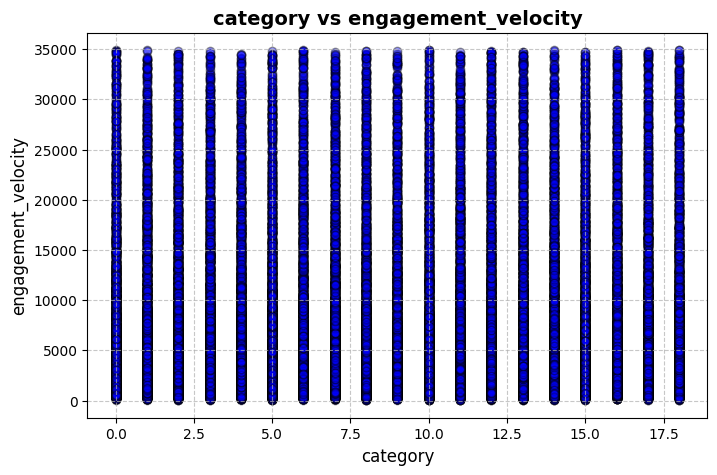

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(df["category"], df["engagement_velocity"], alpha=0.4, color="blue", edgecolors="k")
plt.title("category vs engagement_velocity", fontsize=14, fontweight="bold")
plt.xlabel("category", fontsize=12)
plt.ylabel("engagement_velocity", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

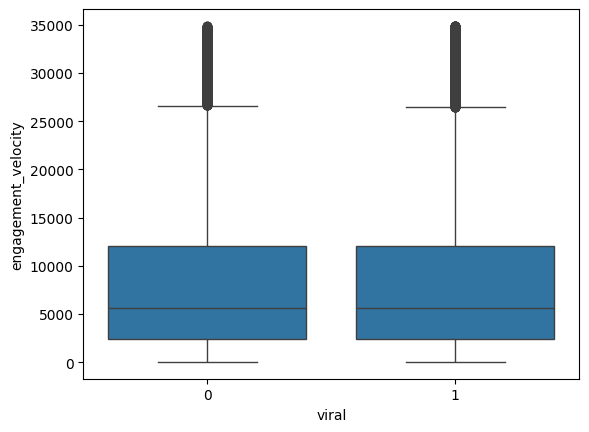

In [15]:
sns.boxplot(data = df, x = "viral", y = "engagement_velocity")
plt.show()

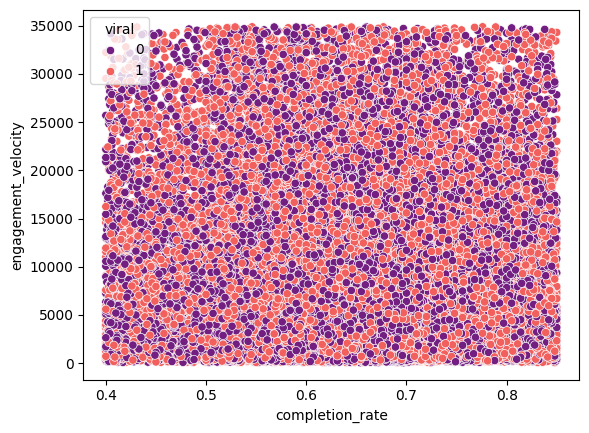

In [16]:
sns.scatterplot(data=df, x= "completion_rate", y="engagement_velocity",  hue = "viral", palette= "magma")
plt.show()

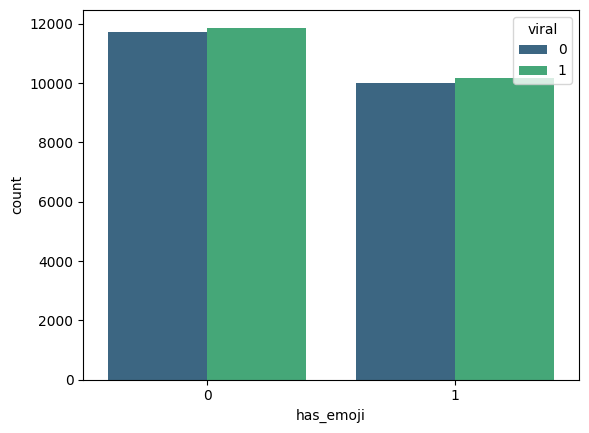

In [17]:
sns.countplot(x  = df["has_emoji"], data = df, hue = df["viral"], palette = "viridis")
plt.show()

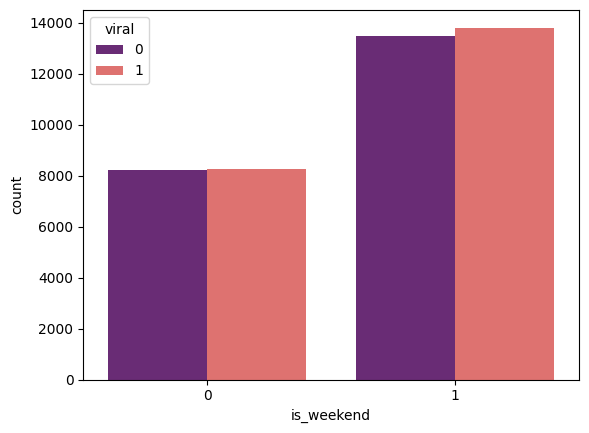

In [18]:
sns.countplot(x  = df["is_weekend"], data = df, hue = df["viral"], palette = "magma")
plt.show()

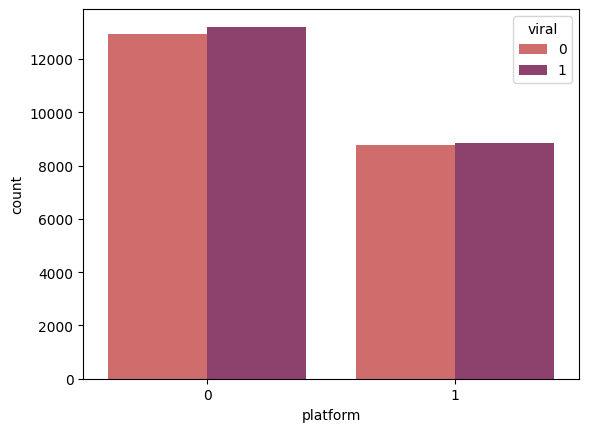

In [19]:
sns.countplot(x  = df["platform"], data = df, hue = df["viral"], palette = "flare")
plt.show()

In [20]:
features =  ["platform", "category", "duration_sec", "completion_rate", "engagement_velocity", "upload_hour", "has_emoji", "is_weekend", "publish_period"]
X = df[features].copy()
y = df["viral"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [23]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]

In [24]:
print("Accuracy :", accuracy_score(y_test, y_pred)) #how many prediction were correct from the total
print("Precision:", precision_score(y_test, y_pred)) #all the positive predictions that models has made, from how many were actually positive
print("Recall   :", recall_score(y_test, y_pred)) #from the actual positives how many were model was able to identify
print("F1-score :", f1_score(y_test, y_pred)) #mean b/w recall and precision. 
print("ROC-AUC  :", roc_auc_score(y_test, y_proba)) # 0 - 1, if towards 1, the model is good. if 0.5 (random guessing)

Accuracy : 0.5022272986864649
Precision: 0.504492286828276
Recall   : 0.6746769440036273
F1-score : 0.5773035887487876
ROC-AUC  : 0.4964900760821869


In [25]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[1421 2923]
 [1435 2976]]


In [32]:
example = [[
    
    1,            # platform (0/1)
    6,            # category (0/13)
    35,           # duration_sec 
    0.437,        # completion_rate
    35,         # engagement_velocity
    15,            # upload_hour
    0,            # has_emoji(0/1)
    1,            # is_weekend(0/1)
    2             # publish_period
    
]]
pred_prob = model.predict_proba(example)[0, 1]
pred_class = model.predict(example)[0]

print("Predicted approval probability:", pred_prob)
print("Predicted class (1=viral, 0=not viral):", pred_class)

Predicted approval probability: 0.5145635917171788
Predicted class (1=viral, 0=not viral): 1


C:\Users\Girish Poojary\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Girish Poojary\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Summary of Linear Regression
 - The predictive model achieved an accuracy of 50.22%, indicating performance close to random classification. While the precision (0.50) is moderate, the recall (0.67) is relatively high, meaning the model is able to
   identify a larger proportion of viral videos. 
 - The F1-score of 0.58 reflects a reasonable balance between precision and recall.
 - However, the ROC-AUC score of 0.49 suggests that the model has weak discriminatory power between viral and non-viral content. 
 - The confusion matrix further confirms this limitation, as the model produces a high number of both false positives and false negatives, indicating significant overlap between the two classes.

In the example prediction, the model estimated a 51.45% probability of virality, classifying the video as viral. This borderline probability shows low confidence in predictions, which again aligns with the weak ROC-AUC.

 **This model is NOT good for deployment**

Reasons:

 - Accuracy close to random guessing

- ROC-AUC ≈ 0.5 (very poor)

 - High misclassification in both classes

 - Low confidence predictions

 This model may be acceptable only as a baseline, not as a final solution.

**Recommendation:**
 - Logistic Regression was used as a baseline due to its simplicity and interpretability. However, the model failed to capture complex non-linear relationships present in user engagement and content characteristics, 
resulting in near-random performance (ROC-AUC ≈ 0.5). 
 - K-Fold (specifically Stratified K-Fold) cross-validation can be applied when Logistic Regression performs poorly.
 - Cross-validation provides a robust estimate of model generalization and helps confirm whether poor performance is due to data split variance or inherent model limitations

<span style="font-size: 20px;"><b>Using Stratified K- Fold Cross validation for better performance</b></span>

In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

df = pd.read_csv("youtube_shorts_tiktok_trends_2025.csv")
df.columns = df.columns.str.strip()

df["trend_label"] = df["trend_label"].str.lower().str.strip()

viral_map = {
    "rising": 1,
    "seasonal": 1,
    "stable": 0,
    "declining": 0
}

df["viral"] = df["trend_label"].map(viral_map)

df = df.dropna(subset=["viral"])

features = [
    "platform",
    "category",
    "duration_sec",
    "completion_rate",
    "engagement_velocity",
    "upload_hour",
    "has_emoji"
]

X = df[features].copy()
y = df["viral"]

label_encoders = {}
for col in ["platform", "category"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

acc_scores = []
prec_scores = []
rec_scores = []
f1_scores = []

n_classes = len(np.unique(y))
cm_total = np.zeros((n_classes, n_classes), dtype=int)

fold = 1
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

   
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

   
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acc_scores.append(acc)
    prec_scores.append(prec)
    rec_scores.append(rec)
    f1_scores.append(f1)

    
    cm = confusion_matrix(y_test, y_pred, labels=np.arange(n_classes))
    cm_total += cm

    print(f"\n----- Fold {fold} -----")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-Score :", f1)
    fold += 1


print("\n===== Cross-Validation Results ({}-Fold) =====".format(k))
print("Mean Accuracy :", np.mean(acc_scores))
print("Mean Precision:", np.mean(prec_scores))
print("Mean Recall   :", np.mean(rec_scores))
print("Mean F1-Score :", np.mean(f1_scores))

print("\nAggregated Confusion Matrix (summed over all folds):\n", cm_total)


print("\n(Last Fold) Classification Report:\n",
      classification_report(y_test, y_pred, target_names=["Not viral","Viral"]))


----- Fold 1 -----
Accuracy : 0.4946963394342762
Precision: 0.4990814451928965
Recall   : 0.5041237113402062
F1-Score : 0.501589906657093

----- Fold 2 -----
Accuracy : 0.4963602329450915
Precision: 0.5007176542956736
Recall   : 0.5035051546391752
F1-Score : 0.5021075357253008

----- Fold 3 -----
Accuracy : 0.49771214642262895
Precision: 0.5020283975659229
Recall   : 0.5103092783505154
F1-Score : 0.5061349693251533

----- Fold 4 -----
Accuracy : 0.5004159733777038
Precision: 0.5046458806524882
Recall   : 0.5040214477211796
F1-Score : 0.5043334709038382

----- Fold 5 -----
Accuracy : 0.5072282891315653
Precision: 0.5111200160288519
Recall   : 0.5260878531656011
F1-Score : 0.5184959349593496

===== Cross-Validation Results (5-Fold) =====
Mean Accuracy : 0.4992825962622532
Mean Precision: 0.5035186787471667
Mean Recall   : 0.5096094890433356
Mean F1-Score : 0.506532363514147

Aggregated Confusion Matrix (summed over all folds):
 [[11648 12183]
 [11891 12357]]

(Last Fold) Classification 

# SUMMARY OF K-FOLD STARTIFIED CROSS VALIDATION

**Results are not better than Logistic Regression**

**Logistic Regression (earlier)**
    Accuracy ≈ 50.2%
    F1 ≈ 57%
    ROC-AUC ≈ 0.50

**KNN with 5-Fold CV (current)**
    Mean Accuracy ≈ 49.9%
    Mean F1 ≈ 50.6%
    Precision & Recall ≈ 50%

**Conclusion:**
KNN performs no better (and slightly worse) than Logistic Regression.

**Recommendation:**

Consistent underperformance across folds indicates model underfitting and highlights the inability of linear and distance-based methods to capture the complex, non-linear relationships inherent in viral content prediction. 

Consequently, more advanced ensemble-based models such as XGBoost are recommended.

Because viral prediction is non-linear and interaction-driven, and XGBoost is the most effective model for capturing such patterns in structured engagement data

# Implementation of XG Boost to achieve better result

In [7]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report)

from xgboost import XGBClassifier

df = pd.read_csv("youtube_shorts_tiktok_trends_2025.csv")
df.columns = df.columns.str.strip()

df["trend_label"] = df["trend_label"].str.lower().str.strip()

viral_map = {
    "rising": 1,
    "seasonal": 1,
    "stable": 0,
    "declining": 0
}

df["viral"] = df["trend_label"].map(viral_map)

df = df.dropna(subset=["viral"])

features = [
    "platform",
    "category",
    "duration_sec",
    "completion_rate",
    "engagement_velocity",
    "upload_hour",
    "has_emoji"
]

X = df[features].copy()
y = df["viral"]

label_encoders = {}
for col in ["platform", "category"]:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

xgb = XGBClassifier(
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,
    min_child_weight=5,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n",
      classification_report(
          y_test,
          y_pred,
          target_names=["Not Viral", "Viral"]))

Accuracy : 0.5019412090959512
Precision: 0.5058641577522877
Recall   : 0.5395189003436426
F1-Score : 0.5221497938007184

Confusion Matrix:
 [[3315 3834]
 [3350 3925]]

Classification Report:
               precision    recall  f1-score   support

   Not Viral       0.50      0.46      0.48      7149
       Viral       0.51      0.54      0.52      7275

    accuracy                           0.50     14424
   macro avg       0.50      0.50      0.50     14424
weighted avg       0.50      0.50      0.50     14424



# Summary of XGBoost Results

 - Despite using XGBoost, the model demonstrates near-random classification performance, similar to Logistic Regression and KNN.

**Performance Overview**

Accuracy (~50.2%)  - Indicates the model is unable to correctly distinguish viral from non-viral content beyond chance level.

Precision (~50.6%) - Half of the videos predicted as viral are actually non-viral, resulting in many false positives.

Recall (~54.0%) - Slightly better at identifying viral videos, but still misses a large proportion of true viral cases.

F1-Score (~52.2%)- Confirms weak balance between precision and recall.

**Confusion Matrix Analysis**

 - False positives and false negatives are both high and nearly equal.

 - No meaningful class separation is achieved.

**Classification Report**

Both classes have precision and recall close to 0.50

Macro and weighted averages indicate no discriminative learning

**Key Insight**

When XGBoost also performs at ~50%, this strongly indicates:

 - Existing features do not contain enough predictive information

 - Viral behavior is influenced by factors not present in the dataset

 - The problem is feature-limited, not model-limited

# Conclusion:
Although XGBoost is a state-of-the-art ensemble model capable of capturing complex non-linear relationships, the model achieved near-random performance on the given dataset. 
This indicates that the available features lack sufficient discriminatory power to predict virality. The findings suggest that virality is driven by additional latent factors 
not captured in the current feature set. 

Consequently, future work should focus on enhanced feature engineering and target redefinition rather than further model complexity.